In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_train=pd.read_csv("train_v9rqX0R.csv")
df_train.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [4]:
df_test=pd.read_csv("test_AbJTz2l.csv")
df_test.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_test.shape

(5681, 11)

# Basics

In [7]:
df=df_train.append(df_test)

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.shape

(14204, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# convert categorical features

In [12]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [14]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].map({'Low Fat':1,'Regular':2,'low fat':3,'LF':4,'reg':5})

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.4+ MB


In [17]:
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [19]:
df["Outlet_Identifier"]=label_encoder.fit_transform(df["Outlet_Identifier"])
df["Item_Type"]=label_encoder.fit_transform(df["Item_Type"])

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int32  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(2), int64(2), object(4)
memory usage: 1.3+ MB


In [22]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [23]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [24]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [25]:
df["Outlet_Location_Type"]=df["Outlet_Location_Type"].map({'Tier 1':1,'Tier 3':2,'Tier 2':3})
df["Outlet_Type"]=df["Outlet_Type"].map({'Supermarket Type1':1,'Supermarket Type2':2,'Grocery Store':3,'Supermarket Type3':4})

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1,0.016047,4,249.8092,9,1999,Medium,1,1,3735.1380
1,DRC01,5.92,2,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,FDN15,17.50,1,0.016760,10,141.6180,9,1999,Medium,1,1,2097.2700
3,FDX07,19.20,2,0.000000,6,182.0950,0,1998,NaN,2,3,732.3800
4,NCD19,8.93,1,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [27]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

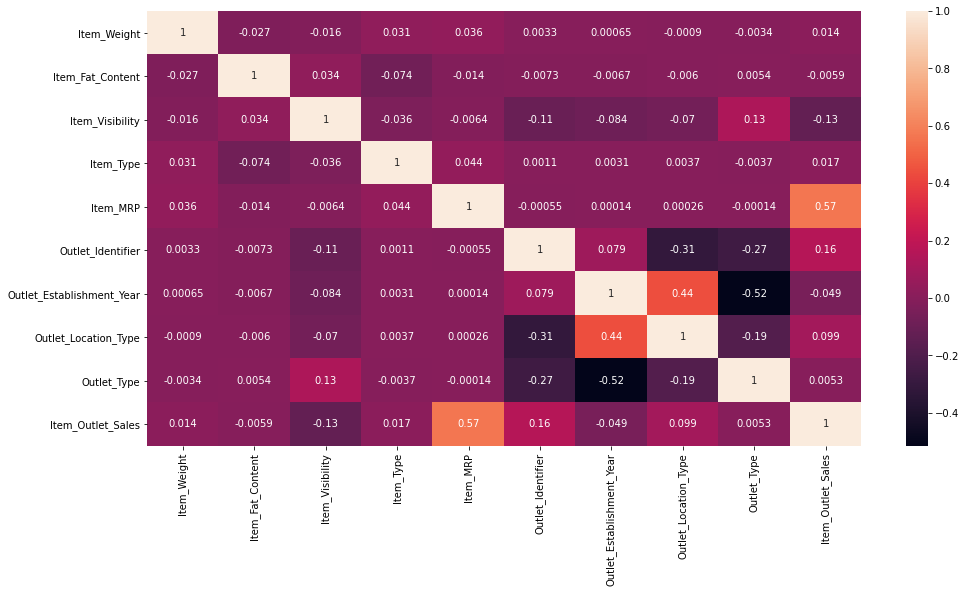

In [28]:
plt.figure(figsize=(16,8))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [29]:
df.drop('Outlet_Size',axis=1,inplace=True)
df.drop('Item_Identifier',axis=1,inplace=True)

In [30]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,1999,1,1,3735.1380
1,5.92,2,0.019278,14,48.2692,3,2009,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,1999,1,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,2,3,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,2,1,994.7052


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                11765 non-null  float64
 1   Item_Fat_Content           14204 non-null  int64  
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  int32  
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  int32  
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Outlet_Location_Type       14204 non-null  int64  
 8   Outlet_Type                14204 non-null  int64  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(2), int64(4)
memory usage: 1.1 MB


In [32]:
df.shape

(14204, 10)

# DEAL with Missing values

In [33]:
df.isnull().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [34]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,1.529851,0.065953,7.229372,141.004977,4.722473,1997.830681,2.046536,1.692270,2181.288914
std,4.652502,0.812073,0.051459,4.213471,62.086938,2.837101,8.371664,0.777701,1.061043,1706.499616
min,4.555000,1.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,1.000000,1.000000,33.290000
25%,8.710000,1.000000,0.027036,4.000000,94.012000,2.000000,1987.000000,1.000000,1.000000,834.247400
50%,12.600000,1.000000,0.054021,6.000000,142.247000,5.000000,1999.000000,2.000000,1.000000,1794.331000
75%,16.750000,2.000000,0.094037,10.000000,185.855600,7.000000,2004.000000,3.000000,2.000000,3101.296400
max,21.350000,5.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,4.000000,13086.964800


In [35]:
df["Item_Weight"]=df["Item_Weight"].fillna(value=df["Item_Weight"].mean())

In [36]:
df.head(49)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,1,0.016047,4,249.8092,9,1999,1,1,3735.1380
1,5.920000,2,0.019278,14,48.2692,3,2009,2,2,443.4228
2,17.500000,1,0.016760,10,141.6180,9,1999,1,1,2097.2700
3,19.200000,2,0.000000,6,182.0950,0,1998,2,3,732.3800
4,8.930000,1,0.000000,9,53.8614,1,1987,2,1,994.7052
5,10.395000,2,0.000000,0,51.4008,3,2009,2,2,556.6088
6,13.650000,2,0.012741,13,57.6588,1,1987,2,1,343.5528
7,12.792854,1,0.127470,13,107.7622,5,1985,2,4,4022.7636
8,16.200000,2,0.016687,5,96.9726,7,2002,3,1,1076.5986
9,19.200000,2,0.094450,5,187.8214,2,2007,3,1,4710.5350


In [37]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# visualisations

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

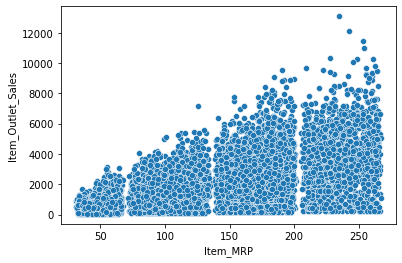

In [38]:
sns.scatterplot('Item_MRP','Item_Outlet_Sales',data=df)

<Figure size 576x360 with 0 Axes>

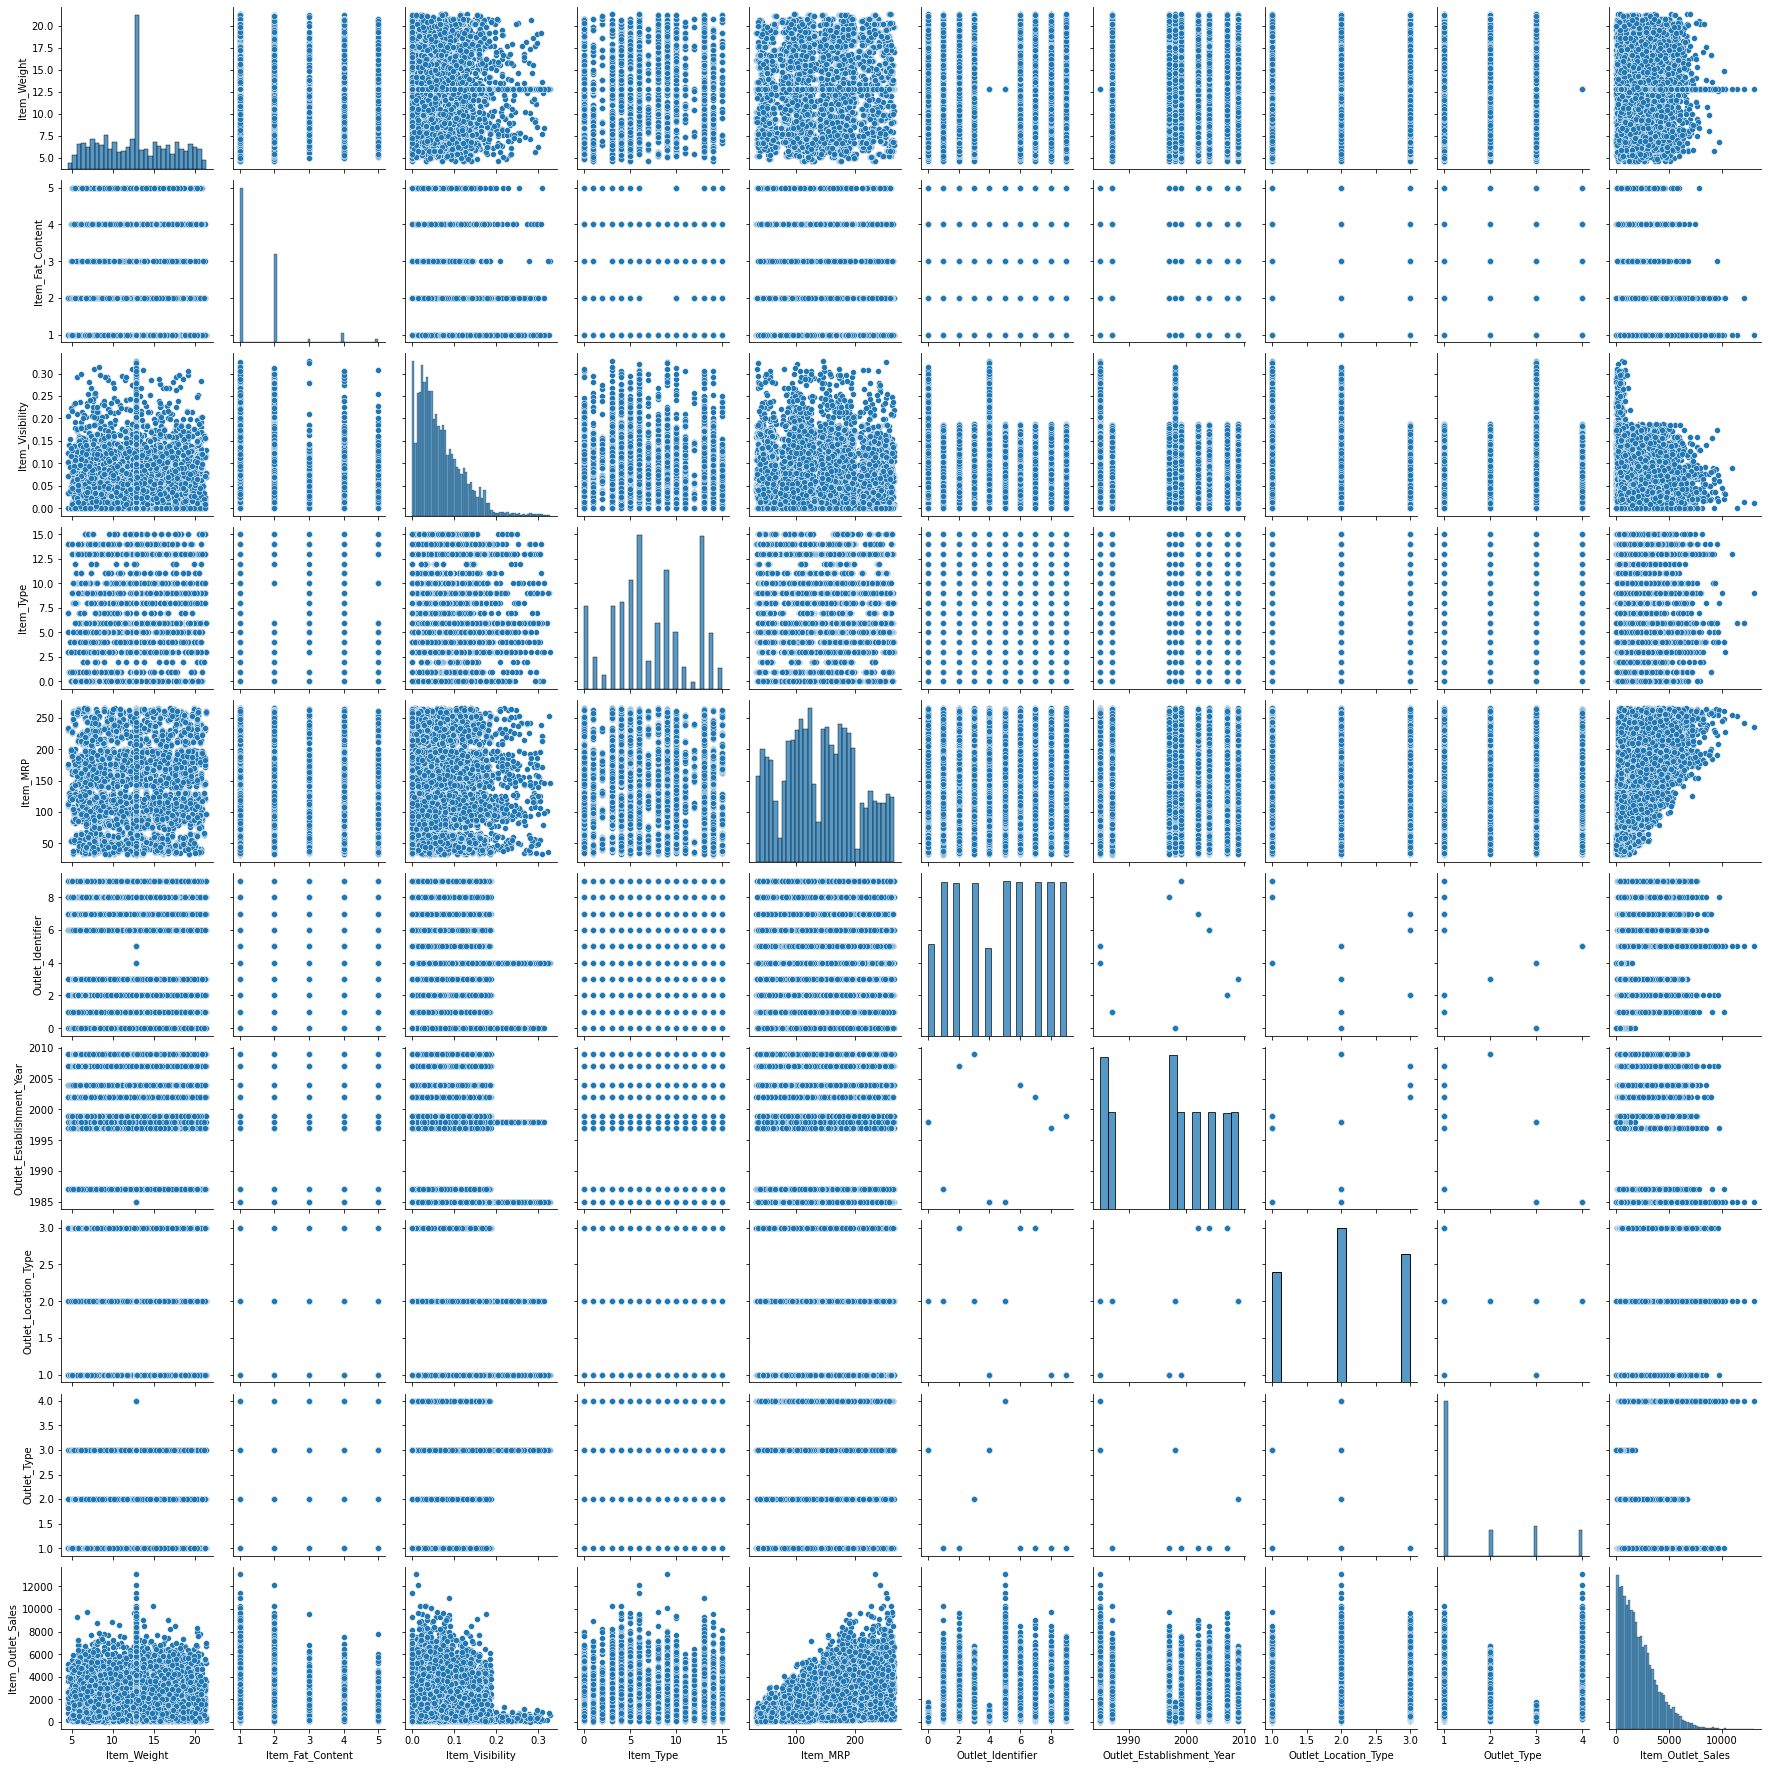

In [39]:
plt.figure(figsize=(8,5))
sns.pairplot(df)

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content'>

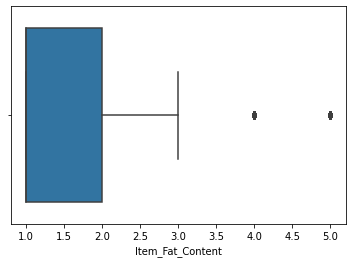

In [40]:
sns.boxplot(df['Item_Fat_Content'])

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

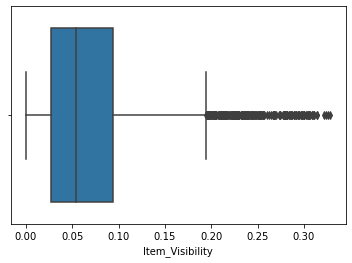

In [41]:
sns.boxplot(df['Item_Visibility'])

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type'>

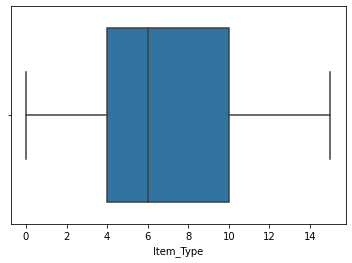

In [42]:
sns.boxplot(df['Item_Type'])

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

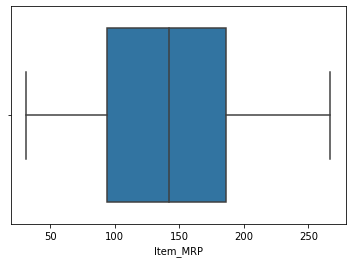

In [43]:
sns.boxplot(df['Item_MRP'])

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier'>

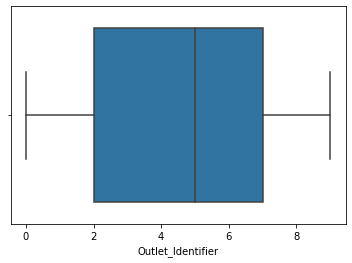

In [44]:
sns.boxplot(df['Outlet_Identifier'])

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type'>

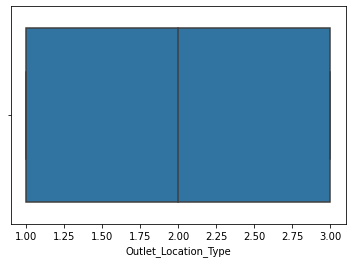

In [45]:
sns.boxplot(df['Outlet_Location_Type'])

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type'>

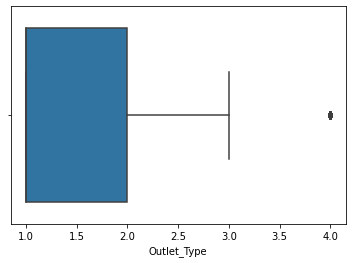

In [46]:
sns.boxplot(df['Outlet_Type'])

C:\Users\91630\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

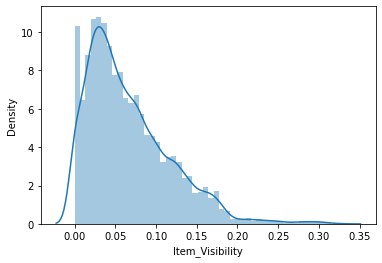

In [47]:
sns.distplot(df['Item_Visibility'].dropna())

C:\Users\91630\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

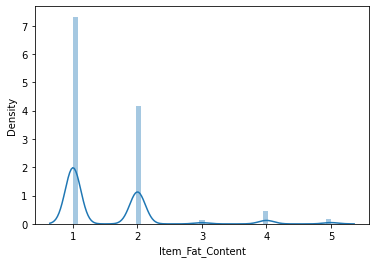

In [48]:
sns.distplot(df['Item_Fat_Content'].dropna())

C:\Users\91630\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

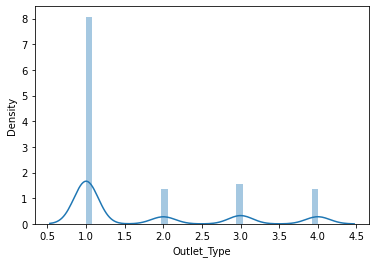

In [49]:
sns.distplot(df['Outlet_Type'].dropna())

In [50]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,1.529851,0.065953,7.229372,141.004977,4.722473,1997.830681,2.046536,1.692270,2181.288914
std,4.234226,0.812073,0.051459,4.213471,62.086938,2.837101,8.371664,0.777701,1.061043,1706.499616
min,4.555000,1.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,1.000000,1.000000,33.290000
25%,9.300000,1.000000,0.027036,4.000000,94.012000,2.000000,1987.000000,1.000000,1.000000,834.247400
50%,12.792854,1.000000,0.054021,6.000000,142.247000,5.000000,1999.000000,2.000000,1.000000,1794.331000
75%,16.000000,2.000000,0.094037,10.000000,185.855600,7.000000,2004.000000,3.000000,2.000000,3101.296400
max,21.350000,5.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,4.000000,13086.964800


# IQR

In [51]:
q1,q3=np.percentile(df['Item_Visibility'],[25,75])

In [52]:
print(q1,q3)

0.0270356825 0.0940372535


In [53]:
iqr=q3-q1
print(iqr)

0.067001571


In [54]:
lower_fence=0.027-(1.5*0.067)
upper_fence=0.094+(1.5*0.067)
print(lower_fence,upper_fence)


-0.07350000000000001 0.1945


In [55]:
df[(df.Item_Visibility<-0.0735)|(df.Item_Visibility>0.1945)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,12.792854,2,0.255395,4,196.8794,4,1985,1,3,780.3176
65,17.700000,4,0.195068,13,185.4266,0,1998,2,3,184.4266
83,12.792854,1,0.293418,9,194.6136,4,1985,1,3,583.2408
108,12.792854,3,0.278974,14,225.3720,4,1985,1,3,679.1160
174,17.700000,1,0.291865,6,115.1834,0,1998,2,3,345.5502
...,...,...,...,...,...,...,...,...,...,...
5469,6.175000,2,0.299739,10,96.1752,0,1998,2,3,NaN
5482,12.792854,2,0.240512,10,181.9608,4,1985,1,3,NaN
5514,14.600000,1,0.252019,14,50.3692,0,1998,2,3,NaN
5571,13.800000,1,0.236595,4,265.0884,0,1998,2,3,NaN


In [56]:
df.loc[df['Item_Visibility']>=0.1945,'Item_Visibility']=0.1945
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,9,1999,1,1,3735.1380
1,5.92,2,0.019278,14,48.2692,3,2009,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,9,1999,1,1,2097.2700
3,19.20,2,0.000000,6,182.0950,0,1998,2,3,732.3800
4,8.93,1,0.000000,9,53.8614,1,1987,2,1,994.7052


C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

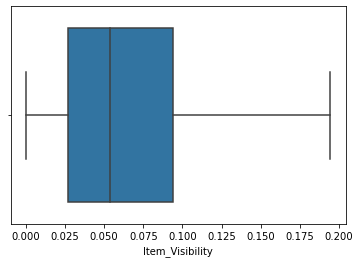

In [57]:
sns.boxplot(df['Item_Visibility'])

C:\Users\91630\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

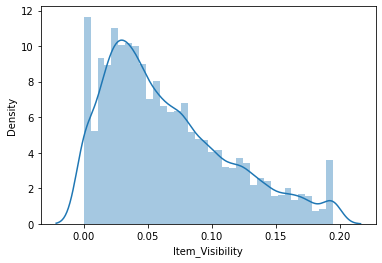

In [58]:
sns.distplot(df['Item_Visibility'])

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [60]:
df['Item_Visibility']=sc.fit_transform(df[['Item_Visibility']])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,-1.011216,4,249.8092,9,1999,1,1,3735.1380
1,5.92,2,-0.944547,14,48.2692,3,2009,2,2,443.4228
2,17.50,1,-0.996508,10,141.6180,9,1999,1,1,2097.2700
3,19.20,2,-1.342349,6,182.0950,0,1998,2,3,732.3800
4,8.93,1,-1.342349,9,53.8614,1,1987,2,1,994.7052


# Train the model

In [61]:
df.shape

(14204, 10)

In [62]:
final_train=df[~df["Item_Outlet_Sales"].isnull()]
final_test=df[df["Item_Outlet_Sales"].isnull()]

In [63]:
final_train.shape

(8523, 10)

In [64]:
final_test.shape

(5681, 10)

In [65]:
final_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,-1.011216,4,249.8092,9,1999,1,1,3735.1380
1,5.92,2,-0.944547,14,48.2692,3,2009,2,2,443.4228
2,17.50,1,-0.996508,10,141.6180,9,1999,1,1,2097.2700
3,19.20,2,-1.342349,6,182.0950,0,1998,2,3,732.3800
4,8.93,1,-1.342349,9,53.8614,1,1987,2,1,994.7052


In [66]:
x=final_train.drop('Item_Outlet_Sales',axis=1)

In [67]:
y=final_train["Item_Outlet_Sales"]

In [68]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,9.30,1,-1.011216,4,249.8092,9,1999,1,1
1,5.92,2,-0.944547,14,48.2692,3,2009,2,2
2,17.50,1,-0.996508,10,141.6180,9,1999,1,1
3,19.20,2,-1.342349,6,182.0950,0,1998,2,3
4,8.93,1,-1.342349,9,53.8614,1,1987,2,1


In [69]:
x.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [70]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [72]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred=model.predict(x_test)

In [74]:
y_pred

array([3080.20356724, 1785.79867092, 1919.22309616, ..., 2220.32860529,
       1899.88064308,  310.47211564])

In [75]:
model.score(x_test,y_test)

0.4024732729954016

In [76]:
final_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,20.750000,1,-1.186250,13,107.8622,9,1999,1,1,NaN
1,8.300000,5,-0.549401,4,87.3198,2,2007,3,1,NaN
2,14.600000,1,0.712361,11,241.7538,0,1998,2,3,NaN
3,7.315000,1,-1.024812,13,155.0340,2,2007,3,1,NaN
4,12.792854,2,1.104927,4,234.2300,5,1985,2,4,NaN


In [77]:
z=final_test.drop("Item_Outlet_Sales",axis=1)

In [78]:
final_test.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [79]:
model.predict(z)

array([1826.94970342, 1231.3230127 , 2969.60375412, ..., 2505.52250317,
       3290.07437803, 1812.43873503])

In [90]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(x_train,y_train)

Ridge()

In [91]:
rdg.predict(z)

array([1827.08797281, 1231.24239465, 2969.72734941, ..., 2505.28626899,
       3289.99590449, 1812.20529755])

In [92]:
rdg.score(x_test,y_test)

0.4024724626660313

In [93]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [94]:
reg.predict(z)

array([1692.976266, 1072.890094,  597.149362, ..., 1743.370668,
       5028.407894, 1698.209454])

In [96]:
reg.score(x_test,y_test)

0.5600557183287278

In [97]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [98]:
grid_search.fit(x_train,y_train)
grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.2min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 300}

In [107]:
reg=RandomForestRegressor(bootstrap=True,max_depth=80,max_features=3,min_samples_leaf=5,min_samples_split=12,n_estimators=300)

In [108]:
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=300)

In [109]:
c_pred=reg.predict(z)

In [110]:
c_pred

array([1737.2750306 , 1288.30600494,  614.81436838, ..., 1656.67280289,
       4658.79334822, 1428.78153143])

In [104]:
reg.score(x_test,y_test)

0.5962958410832058

In [81]:
from xgboost import XGBRegressor 
xg=XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [82]:
xg.predict(x_test)

array([1980.0886, 1830.1216, 2696.4402, ...,  539.3049, 2278.5913,
       1030.0123], dtype=float32)

In [83]:
xg.score(x_test,y_test)

0.5385767902873588

In [84]:
z_pred=xg.predict(z)

In [85]:
z_pred

array([1807.9945 , 1600.4858 ,  310.23157, ..., 1615.7601 , 4646.6255 ,
       1516.9873 ], dtype=float32)

In [86]:
import pickle
filename='finalized_model.pkl'
pickle.dump(x,open(filename,'wb'))

In [115]:
pred=pd.DataFrame(c_pred)
sub_df=pd.read_csv('sample_submission_8RXa3c6.csv')
datasets=pd.concat([sub_df[['Item_Identifier','Outlet_Identifier']],pred],axis=1)
datasets.columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
datasets.to_csv('sample_sub47.csv',index=False)